Data has been downloaded to a folder called SIM_DATA within this folder

In [242]:
# Scientific imports

%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astroquery.mast import Observations
from astroquery.mast import Catalogs

# General imports

import csv, math, os, os.path, sys, random
import pandas as pd
import seaborn as sb
from sklearn import metrics
from IPython.display import display

plt.rcParams["figure.figsize"] = (20,9)
sb.set()

In [17]:
# Reading which LC datafiles we have into a list

fitsList = []
fitsroot = "SIM_DATA/"
fits_directories = [x[0] for x in os.walk('./SIM_DATA/.', topdown=True)]

for fitsroot, fits_dirs, fits_files in os.walk(fitsroot):
    for fits_file in fits_files:
        fullpath = os.path.join(fitsroot, fits_file)
        if (os.path.splitext(fullpath.lower())[1]).endswith('.fits'):
            fitsList.append(fullpath)
print("Number of FITS files: {}".format(len(fitsList)))
#for num, i in enumerate(fitsList):
#    print ("{}: {}".format(num, i))
    
print(len(fitsList))

Number of FITS files: 900
900


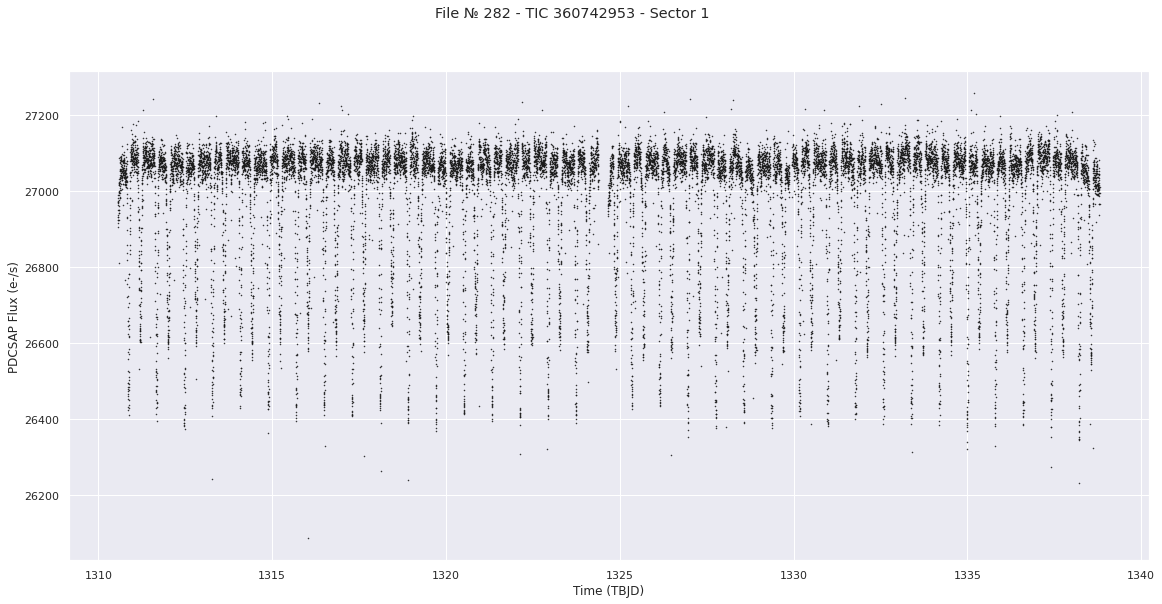

In [243]:
rndFile = random.randint(0,len(fitsList))

fileNum = 282 ########fitsList[rndFile]
fitsFile = fitsList[fileNum]
#check = fits.info(file)

# The following line of code gives us the header values
fitsHeaders = fits.getheader(fitsFile)
#fitsHeaders

#fits.getdata(file, ext=1).columns

with fits.open(fitsFile, mode="readonly") as hdulist:
    
    # Extract stellar parameters from the primary header.  We'll get the effective temperature, surface gravity,
    # and TESS magnitude.
    star_teff = hdulist[0].header['TEFF']
    star_logg = hdulist[0].header['LOGG']
    star_tmag = hdulist[0].header['TESSMAG']
    obj = hdulist[0].header['OBJECT']
    sector = hdulist[0].header['SECTOR']
    
    # Extract some of the fit parameters for the first TCE.  These are stored in the FITS header of the first
    # extension.
    #period = hdulist[1].header['TPERIOD']
    #duration = hdulist[1].header['TDUR']
    duration = (hdulist[1].header['LIVETIME'])
    #epoch = hdulist[1].header['TEPOCH']
    #depth = hdulist[1].header['TDEPTH']
    
    # Extract some of the columns of interest for the first TCE signal.  These are stored in the binary FITS table
    # in the first extension.  We'll extract the timestamps in TBJD, phase, initial fluxes, and corresponding
    # model fluxes.
    #times = hdulist[1].data['TIME']
    #phases = hdulist[1].data['PHASE']
    #fluxes_init = hdulist[1].data['LC_INIT']
    #model_fluxes_init = hdulist[1].data['MODEL_INIT']
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    
# Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
#t0 = 1327.520678

# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
## Using the [1:-1] identifier to cut off the leading and trailing zeroes

ax.plot(tess_bjds[1:-1], pdcsap_fluxes[1:-1], 'k.', markersize=1)

# Center the x-axis on where we expect a transit to be (time = T0), and set
# the x-axis range within +/- 1 day of T0.
########ax.set_xlim(t0 - 1.0, t0 + 1.0)

# Overplot a red vertical line that should be where the transit occurs.
########ax.axvline(x=t0, color="red")

# Let's label the axes and define a title for the figure.
fig.suptitle("File № {} - {} - Sector {}".format(fileNum, str(obj), str(sector))) # + str(obj) + " - Sector " + str(sector))
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
#plt.figure(figsize=(2,8))
plt.show()

In [244]:
fits.getdata(fitsFile, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [245]:
fitsHeaders

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    T / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2018-06-17'         / file creation date.                            
TSTART  =    1310.550000000000 / observation start time in TJD                  
TSTOP   =    1338.800000000000 / observation stop time in TJD                   
DATE-OBS= '2018-07-11T01:10:

~~Let's try working out the (an?) epoch! We can do this using Astroquery's "BoxLeastSquares" algorithm:  
https://docs.astropy.org/en/stable/timeseries/~~

SCRATCH THAT FOLD THINGS MAKE GOOD HAHAHA  
https://docs.astropy.org/en/stable/timeseries/analysis.html

In [226]:
from astropy import units as u
from astropy.timeseries import BoxLeastSquares
from astropy.timeseries import TimeSeries
from astropy.timeseries import aggregate_downsample
ts = TimeSeries.read(fitsFile, format='tess.fits')

#time_bin_size can be changed to modify the bin widths
tess_binned = aggregate_downsample(ts, time_bin_size=20 * u.min, aggregate_func=np.nanmedian)

# The below would be if we used the Timeseries BLS algorithm, but it didn't seem to work, and I don't wanna mess around with it rn as I have something that seems to work
#periodogram = BoxLeastSquares.from_timeseries(tess_bjds, pdcsap_fluxes) 

/home/jdowzell/anaconda3/lib/python3.8/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 259 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))


Text(0, 0.5, 'SAP Flux (e-/s)')

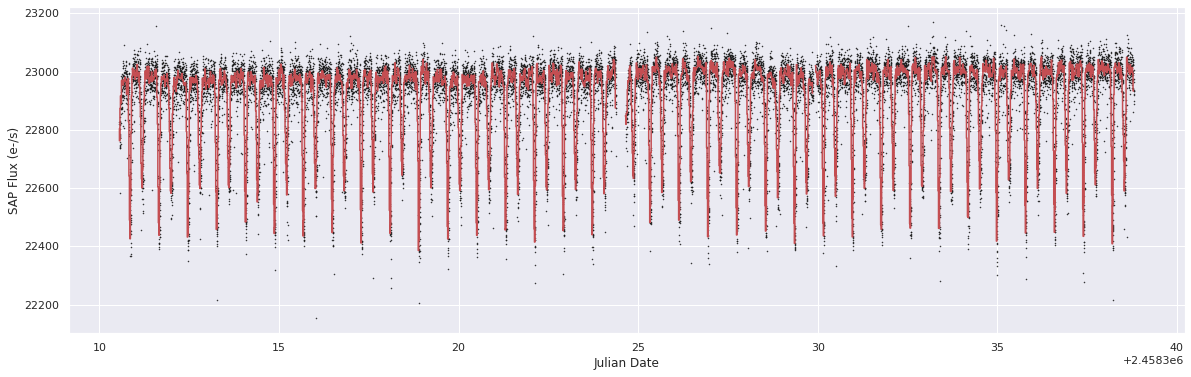

In [227]:
plt.plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1)
plt.plot(tess_binned.time_bin_start.jd, tess_binned['sap_flux'], 'r-', drawstyle='steps-pre')
plt.xlabel('Julian Date')
plt.ylabel('SAP Flux (e-/s)')

Text(0, 0.5, 'SAP Flux (e-/s)')

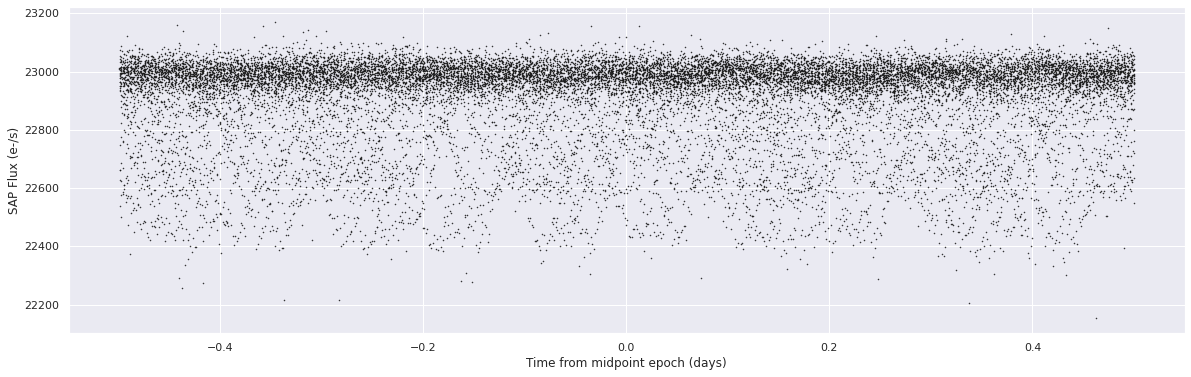

In [228]:
tess_folded = ts.fold(period= 1 * u.day) ######, epoch_time='2009-05-02T20:53:40')

plt.plot(tess_folded.time.jd, tess_folded['sap_flux'], 'k.', markersize=1)
plt.xlabel('Time from midpoint epoch (days)')
plt.ylabel('SAP Flux (e-/s)')

As you can see from above, using incorrect parameters for period and epoch yields a messy, non-in-phase graph.  
Thus my next major goal is to find out the period and epoch from the above graph.  
Let's try just plotting the 'binned' graph and working from there.

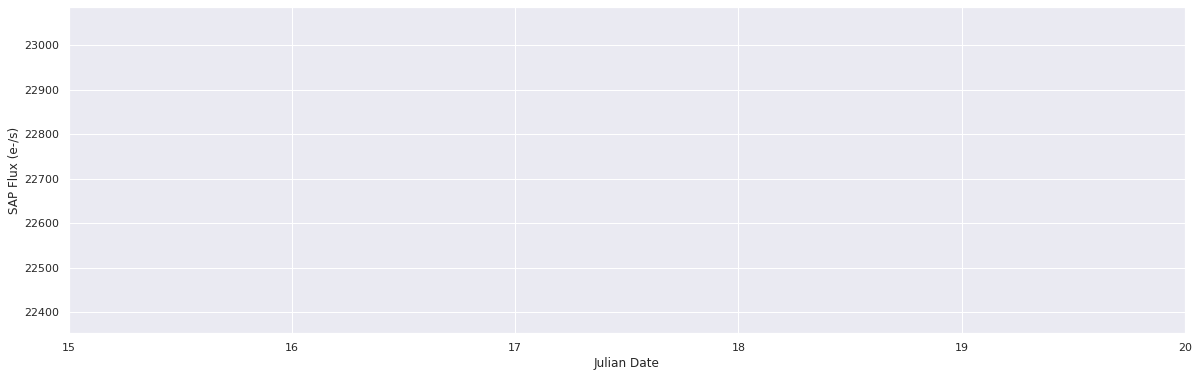

In [240]:
justbinned, ax = plt.subplots()

x = tess_binned.time_bin_start.jd
y = tess_binned['sap_flux']

ax.plot(tess_binned.time_bin_start.jd, tess_binned['sap_flux'], 'r-', drawstyle='steps-pre')
#justbinned.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("SAP Flux (e-/s)")
ax.set_xlabel("Julian Date")
ax.set_xlim([15,20])

plt.show()

#plt.plot(tess_binned.time_bin_start.jd, tess_binned['sap_flux'], 'r-', drawstyle='steps-pre')
#plt.xlabel('Julian Date')
#plt.ylabel('SAP Flux (e-/s)')
#plt.xlim([15,20])
#plt.show()

In [ ]:
plt.xlim()